# EXERCÍCIO 03
  ## Analisando um Conjunto de Dados Usando o Algoritmo A Priori

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
!pip -qq install apyori
import apyori

  Preparing metadata (setup.py) ... done


In [7]:
df = pd.read_csv("market-basket-optimisation.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [9]:
for index in df.columns:
  df[index] = df[index].str.strip()

In [13]:
itens = df.melt()["value"].dropna().sort_values()
print(f"Existem {itens.nunique()} produtos distintos:\n", itens.unique())

Existem 119 produtos distintos:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffins'

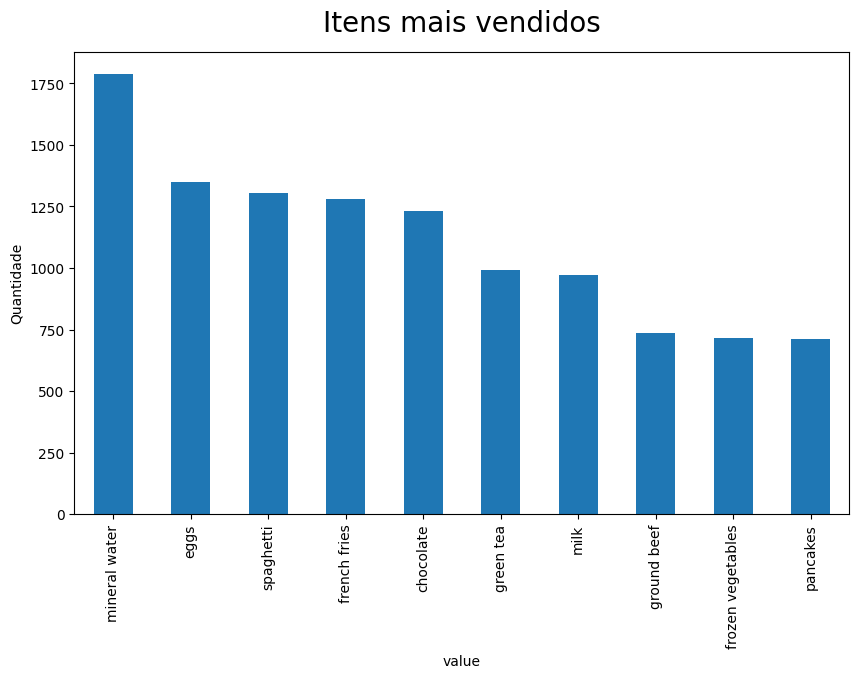

In [19]:
qtde_itens = itens.value_counts()
barra = qtde_itens.nlargest(10).plot(kind="bar")
barra.set_title("Itens mais vendidos", size=20,weight=500,pad=15)
barra.set_ylabel("Quantidade")
plt.show()

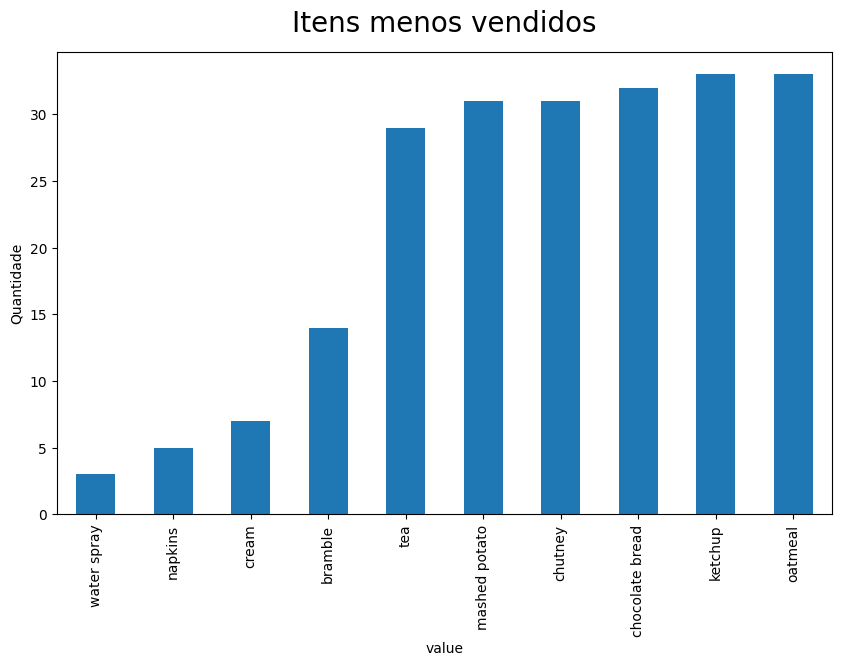

In [20]:
qtde_itens = itens.value_counts()
barra = qtde_itens.nsmallest(10).plot(kind="bar")
barra.set_title("Itens menos vendidos", size=20,weight=500,pad=15)
barra.set_ylabel("Quantidade")
plt.show()

In [21]:
qtde_por_cesta = df.notna().apply(sum, axis=1)

In [24]:
cestas = [set(linha.dropna()) for _, linha in df[qtde_por_cesta > 1].iterrows()]
cestas[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [25]:
len(cestas)

5747

In [26]:
minsup = 0.04
minconf = 0.03

regras_associacao = apyori.apriori(cestas, min_support=minsup, min_cofidence=minconf)

for regra in regras_associacao:
  itens = list(regra.items)
  print(
      f"{itens[:-1]} --> [{itens[-1]}] Suporte: {regra.support:.3f}"
      f"Confiança: {regra.ordered_statistics[0].confidence:.3f}"
  )

[] --> [avocado] Suporte: 0.042Confiança: 0.042
[] --> [brownies] Suporte: 0.041Confiança: 0.041
[] --> [burgers] Suporte: 0.110Confiança: 0.110
[] --> [cake] Suporte: 0.101Confiança: 0.101
[] --> [champagne] Suporte: 0.053Confiança: 0.053
[] --> [chicken] Suporte: 0.077Confiança: 0.077
[] --> [chocolate] Suporte: 0.201Confiança: 0.201
[] --> [cookies] Suporte: 0.066Confiança: 0.066
[] --> [cooking oil] Suporte: 0.065Confiança: 0.065
[] --> [eggs] Suporte: 0.219Confiança: 0.219
[] --> [escalope] Suporte: 0.086Confiança: 0.086
[] --> [french fries] Suporte: 0.200Confiança: 0.200
[] --> [fresh bread] Suporte: 0.054Confiança: 0.054
[] --> [frozen smoothie] Suporte: 0.079Confiança: 0.079
[] --> [frozen vegetables] Suporte: 0.121Confiança: 0.121
[] --> [grated cheese] Suporte: 0.065Confiança: 0.065
[] --> [green tea] Suporte: 0.160Confiança: 0.160
[] --> [ground beef] Suporte: 0.125Confiança: 0.125
[] --> [herb & pepper] Suporte: 0.061Confiança: 0.061
[] --> [honey] Suporte: 0.061Confiança: